### Diamond Price Prediction Project
In this project, we aim to predict the price of diamonds using various regression algorithms. Diamonds are valued based on several characteristics, which we refer to as features. Understanding how these features influence the price allows us to build predictive models that can assist buyers, sellers, and investors in the diamond market.

Dataset Overview
The dataset contains 10 features, with 'Price (in US dollars)' as the dependent variable we wish to predict. The features are as follows:

Carat: Represents the weight of the diamond. Heavier diamonds typically have a higher price due to their rarity and desirability.

Cut: Refers to the quality of the diamond's cut, which significantly affects its brilliance and overall aesthetic appeal. The categories are:

Fair
Good
Very Good
Premium
Ideal
Color: Describes the color of the diamond, ranging from J (worst) to D (best). Colorless diamonds are generally more valuable.

Clarity: Measures the diamond's transparency and presence of inclusions. The clarity grades are:

I1 (worst quality)
SI2
SI1
VS2
VS1
VVS2
VVS1
IF (best quality)
Table: Represents the width of the diamond's top surface, affecting its light performance and visual appeal.

Price (in US dollars): This is the target variable, representing the market price of the diamond.

X (Length): The length of the diamond in millimeters.

Y (Width): The width of the diamond in millimeters.

Z (Depth): The depth of the diamond in millimeters.

Objectives
The primary objective of this project is to build and evaluate different regression models to predict the price of diamonds based on the above features. By understanding the relationships between the features and the target variable, we can enhance the accuracy of our price predictions.

Methodology
Data Preprocessing:

Clean the dataset by handling missing values and correcting any inconsistencies.
Encode categorical variables (like Cut, Color, and Clarity) into numerical values for model compatibility.
Normalize or standardize numerical features to ensure uniformity in scale.
Feature Selection:

Analyze the features to determine their importance in predicting the price.
Use techniques like correlation matrices and feature importance plots to identify relevant features.
Model Selection:

Implement various regression algorithms, including:
Linear Regression
Decision Tree Regression
Random Forest Regression
Gradient Boosting Regression
Support Vector Regression (SVR)
Evaluate model performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared value.
Model Tuning:

Optimize hyperparameters for selected models to enhance their performance through techniques like Grid Search and Cross-Validation.
Evaluation:

Compare the performance of different models to determine which provides the best predictive accuracy for diamond prices.


In [32]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
data = pd.read_csv('C:\\MLPro\\articrafts\\data\\Diamond Price Prediction.csv')

In [34]:
# Display the first few rows of the dataset
print(data.head())


   Carat(Weight of Daimond) Cut(Quality) Color Clarity  Depth  Table  \
0                      0.23        Ideal     E     SI2   61.5   55.0   
1                      0.21      Premium     E     SI1   59.8   61.0   
2                      0.23         Good     E     VS1   56.9   65.0   
3                      0.29      Premium     I     VS2   62.4   58.0   
4                      0.31         Good     J     SI2   63.3   58.0   

   Price(in US dollars)  X(length)  Y(width)  Z(Depth)  
0                   326       3.95      3.98      2.43  
1                   326       3.89      3.84      2.31  
2                   327       4.05      4.07      2.31  
3                   334       4.20      4.23      2.63  
4                   335       4.34      4.35      2.75  


In [35]:
# Basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


In [36]:
# Clean column names
data.columns = [col.strip().replace(' ', '_').replace('(', '').replace(')', '') for col in data.columns]
print(data.columns)

Index(['CaratWeight_of_Daimond', 'CutQuality', 'Color', 'Clarity', 'Depth',
       'Table', 'Pricein_US_dollars', 'Xlength', 'Ywidth', 'ZDepth'],
      dtype='object')


In [37]:
# Summary statistics
print(data.describe())

       CaratWeight_of_Daimond         Depth         Table  Pricein_US_dollars  \
count            53940.000000  53940.000000  53940.000000        53940.000000   
mean                 0.797940     61.749405     57.457184         3932.799722   
std                  0.474011      1.432621      2.234491         3989.439738   
min                  0.200000     43.000000     43.000000          326.000000   
25%                  0.400000     61.000000     56.000000          950.000000   
50%                  0.700000     61.800000     57.000000         2401.000000   
75%                  1.040000     62.500000     59.000000         5324.250000   
max                  5.010000     79.000000     95.000000        18823.000000   

            Xlength        Ywidth        ZDepth  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000 

In [38]:
# Check for missing values
print(data.isnull().sum())

CaratWeight_of_Daimond    0
CutQuality                0
Color                     0
Clarity                   0
Depth                     0
Table                     0
Pricein_US_dollars        0
Xlength                   0
Ywidth                    0
ZDepth                    0
dtype: int64


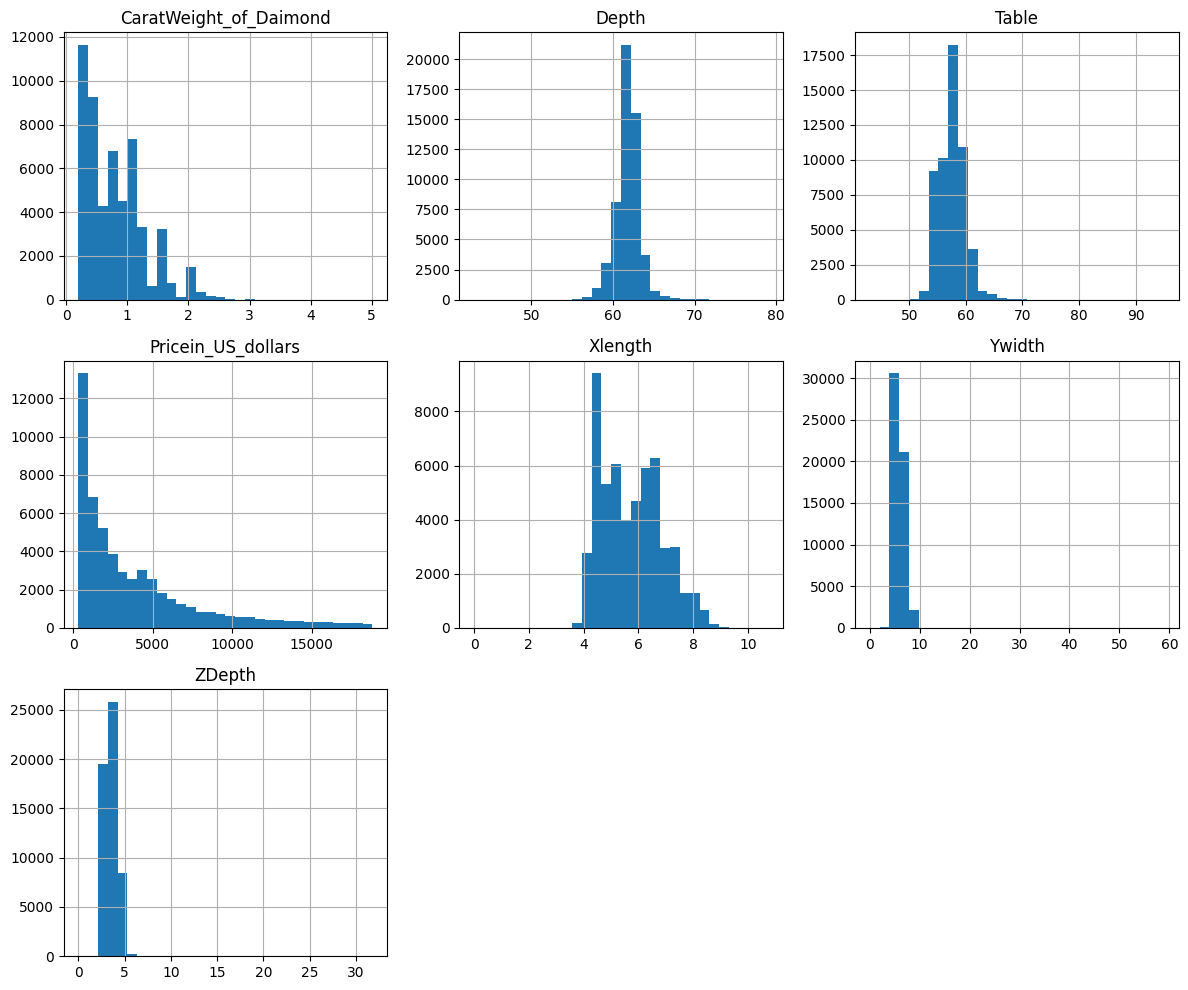

In [39]:
# Histogram of numeric features
data.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

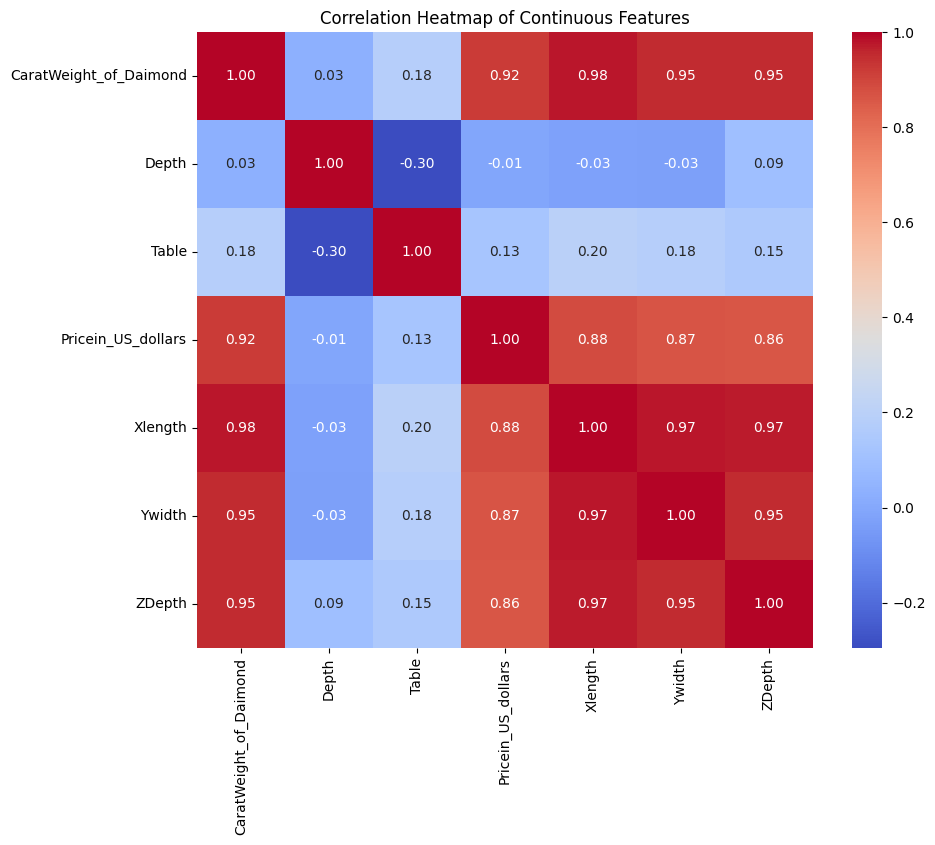

In [40]:

# Correlation heatmap - Only for continuous features
continuous_features = data.select_dtypes(include=['float64', 'int64'])  # Select continuous features
plt.figure(figsize=(10, 8))
sns.heatmap(continuous_features.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()


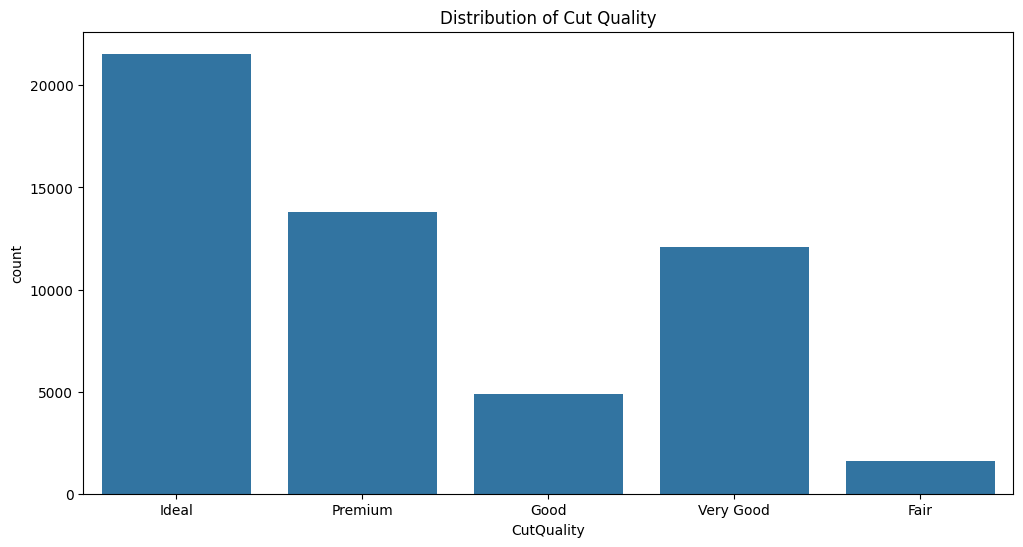

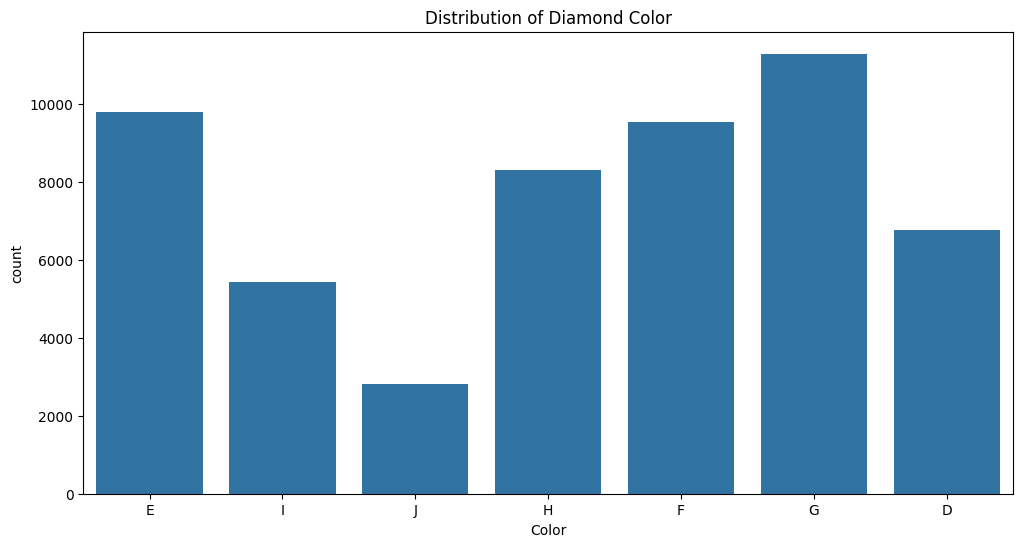

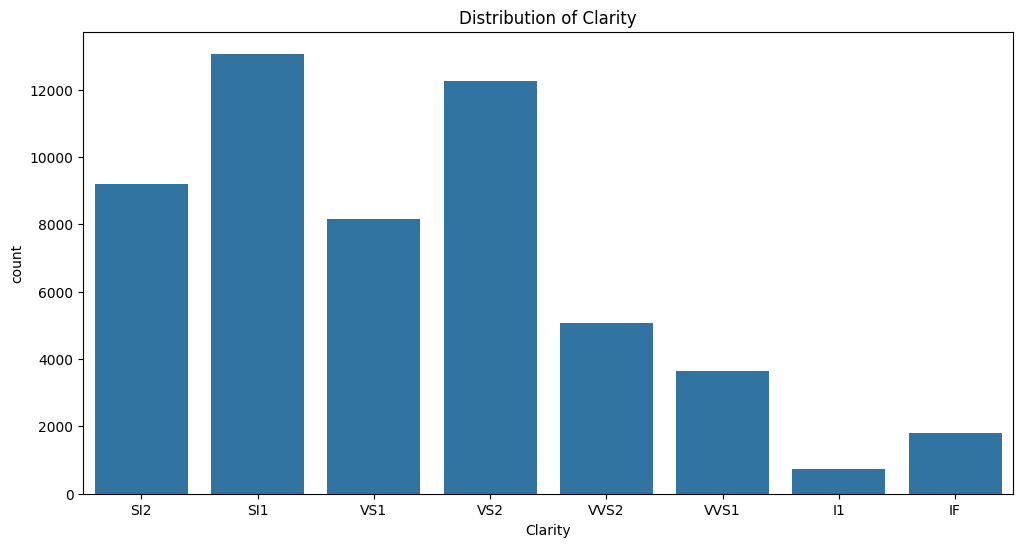

In [41]:

# Categorical feature counts
# Visualizing categorical features separately
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='CutQuality')
plt.title('Distribution of Cut Quality')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Color')
plt.title('Distribution of Diamond Color')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Clarity')
plt.title('Distribution of Clarity')
plt.show()


In [42]:
# Encoding categorical features
label_encoder = LabelEncoder()
data['CutQuality'] = label_encoder.fit_transform(data['CutQuality'])
data['Color'] = label_encoder.fit_transform(data['Color'])
data['Clarity'] = label_encoder.fit_transform(data['Clarity'])

In [43]:
X = data.drop('Pricein_US_dollars', axis=1)  # Features
y = data['Pricein_US_dollars'] 

In [49]:
data.columns

Index(['CaratWeight_of_Daimond', 'CutQuality', 'Color', 'Clarity', 'Depth',
       'Table', 'Pricein_US_dollars', 'Xlength', 'Ywidth', 'ZDepth'],
      dtype='object')

In [45]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train

array([[ 2.56005606, -1.51451263, -0.3479487 , ...,  2.22945022,
         2.13820916,  1.73820671],
       [ 0.44739205,  1.40673934, -0.93662126, ...,  0.74754991,
         0.65671016,  0.5377332 ],
       [ 0.63753181,  0.43298868,  0.82939642, ...,  0.76540413,
         0.70028366,  0.79195112],
       ...,
       [-0.98921948,  1.40673934, -0.3479487 , ..., -1.10928903,
        -1.11237394, -1.18529936],
       [ 0.21499901,  0.43298868,  2.00674153, ...,  0.35475706,
         0.25583396,  0.39650102],
       [ 0.72203837,  0.43298868, -0.3479487 , ...,  0.97072767,
         0.91815116,  0.80607434]])

In [50]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Display the shapes of the training and testing sets
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')

Training set shape: (43152, 9), Testing set shape: (10788, 9)
